In [ ]:
from __future__ import print_function

import argparse

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!nvidia-smi

Thu Dec  8 16:52:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    32W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
num_classes = 10


# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype("float32")

x_test = x_test.astype("float32")

# Standardizing (255 is the total number of pixels an image can have)
x_train = x_train / 255
x_test = x_test / 255 

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
model = Sequential()
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
name = {}
SGD_Momentum = tf.keras.optimizers.SGD(momentum=0.9)
SGD_Nesterov = tf.keras.optimizers.SGD(nesterov=True)
optimizer_list = ['SGD',SGD_Momentum, SGD_Nesterov, 'RMSprop', 'Nadam', 'Adam', 'Adadelta', 'Adagrad', 'Adamax']
for i in range(9):
    model.compile(optimizer=optimizer_list[i], loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
    name['history%s' % i] = model.fit(x_train, y_train, batch_size=32, epochs=100,validation_data=(x_test, y_test))

Epoch 1/100
1563/1563 [==============================] - 20s 7ms/step - loss: 1.7667 - accuracy: 0.3884 - val_loss: 4.8255 - val_accuracy: 0.2308
Epoch 2/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3489 - accuracy: 0.5148 - val_loss: 2.7916 - val_accuracy: 0.3459
Epoch 3/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2152 - accuracy: 0.5686 - val_loss: 2.7731 - val_accuracy: 0.3918
Epoch 4/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1344 - accuracy: 0.5991 - val_loss: 2.5851 - val_accuracy: 0.3629
Epoch 5/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0737 - accuracy: 0.6198 - val_loss: 1.8393 - val_accuracy: 0.4763
Epoch 6/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0278 - accuracy: 0.6392 - val_loss: 1.7948 - val_accuracy: 0.5185
Epoch 7/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9904 - accuracy: 0.6522 - val_loss: 1.7860 -

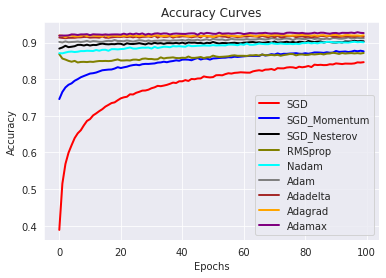

In [ ]:
optimizer_list = ['SGD',SGD_Momentum, SGD_Nesterov, 'RMSprop', 'Nadam', 'Adam', 'Adadelta', 'Adagrad', 'Adamax']
# Accuracy curve
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

plt.figure(figsize=[6,4])
plt.plot(name['history0'].history['accuracy'], 'red', linewidth=2.0,label="SGD")
plt.plot(name['history1'].history['accuracy'], 'blue', linewidth=2.0,label="SGD_Momentum")
plt.plot(name['history2'].history['accuracy'], 'black', linewidth=2.0,label="SGD_Nesterov")
plt.plot(name['history3'].history['accuracy'], 'olive', linewidth=2.0,label="RMSprop")
plt.plot(name['history4'].history['accuracy'], 'cyan', linewidth=2.0,label="Nadam")
plt.plot(name['history5'].history['accuracy'], 'gray', linewidth=2.0,label="Adam")
plt.plot(name['history6'].history['accuracy'], 'brown', linewidth=2.0,label="Adadelta")
plt.plot(name['history7'].history['accuracy'], 'orange', linewidth=2.0,label="Adagrad")
plt.plot(name['history8'].history['accuracy'], 'purple', linewidth=2.0,label="Adamax")
plt.legend(fontsize=10)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)
plt.savefig('Figure.png')

In [ ]:
import dill
dill.dump_session('notebook_session.db')

In [ ]:
import dill
dill.load_session('notebook_session.db')

In [ ]:
model.save('cifar10_oladayo.h5')

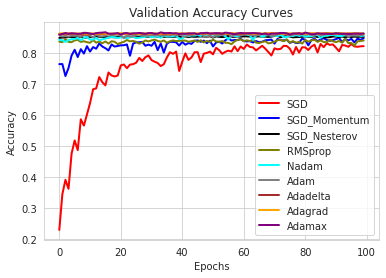

In [ ]:
optimizer_list = ['SGD',SGD_Momentum, SGD_Nesterov, 'RMSprop', 'Nadam', 'Adam', 'Adadelta', 'Adagrad', 'Adamax']
# Accuracy curve
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=[6,4])
plt.plot(name['history0'].history['val_accuracy'], 'red', linewidth=2.0,label="SGD")
plt.plot(name['history1'].history['val_accuracy'], 'blue', linewidth=2.0,label="SGD_Momentum")
plt.plot(name['history2'].history['val_accuracy'], 'black', linewidth=2.0,label="SGD_Nesterov")
plt.plot(name['history3'].history['val_accuracy'], 'olive', linewidth=2.0,label="RMSprop")
plt.plot(name['history4'].history['val_accuracy'], 'cyan', linewidth=2.0,label="Nadam")
plt.plot(name['history5'].history['val_accuracy'], 'gray', linewidth=2.0,label="Adam")
plt.plot(name['history6'].history['val_accuracy'], 'brown', linewidth=2.0,label="Adadelta")
plt.plot(name['history7'].history['val_accuracy'], 'orange', linewidth=2.0,label="Adagrad")
plt.plot(name['history8'].history['val_accuracy'], 'purple', linewidth=2.0,label="Adamax")
plt.legend(fontsize=10)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Validation Accuracy Curves', fontsize=12)
plt.savefig('Figure1val_.png')

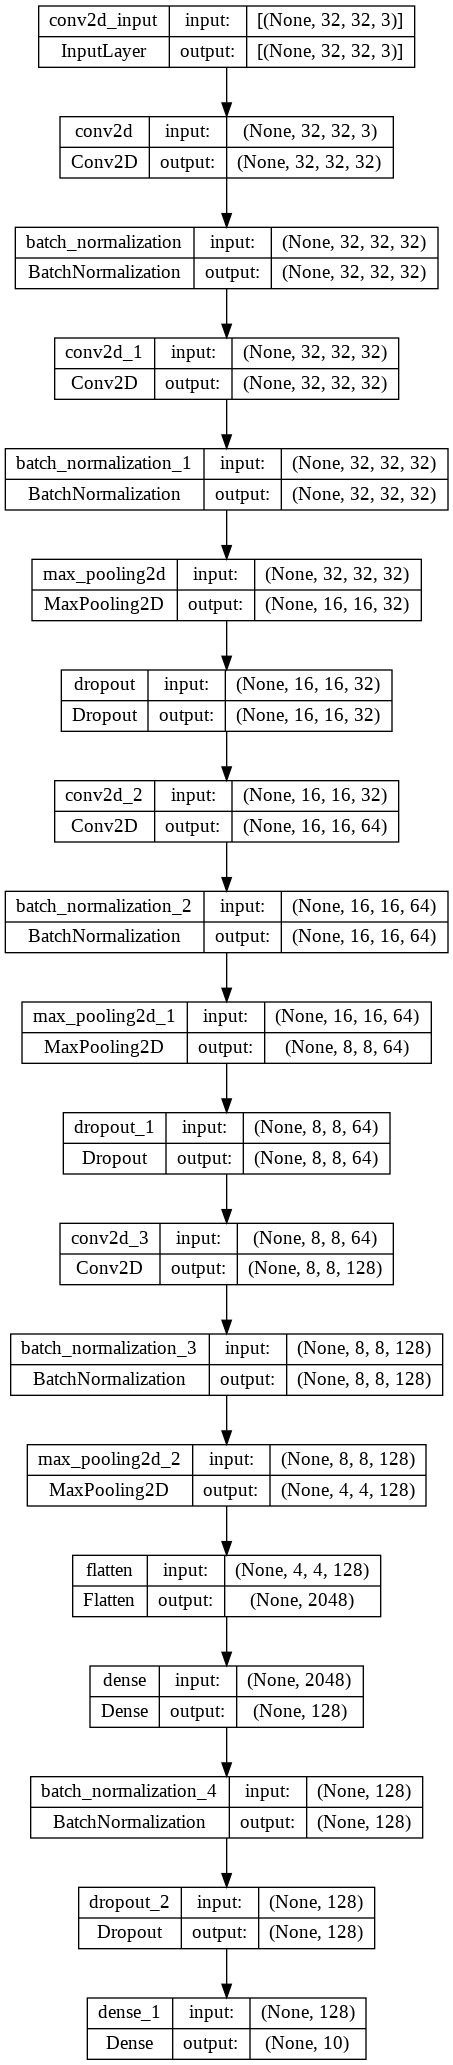

In [ ]:
dot_img_file = './model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
import tensorflow as tf


In [ ]:
!pip install visualkeras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 46.6 MB/s 


In [ ]:
import visualkeras

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show